In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from pandas_ml import ConfusionMatrix
%matplotlib inline

In [6]:
train_df = pd.read_csv('blood_train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Unnamed: 0                     576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [7]:
train_df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [8]:
train_df.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [9]:
train_df=train_df.rename(columns = {'Unnamed: 0':'ID'})
train_df['donation_span'] = train_df['Months since First Donation'] - train_df['Months since Last Donation']

train_df['cc per year'] = train_df['donation_span'] / 12
train_df['cc per year'] = train_df['Total Volume Donated (c.c.)'] / train_df['cc per year']
train_df['cc per year'] = train_df['cc per year'].replace([np.inf, -np.inf], np.nan)
train_df['cc per year'] = train_df['cc per year'].fillna(0)
train_df['Avg #Donation per year'] = train_df['Months since First Donation'] / 12
train_df['Avg #Donation per year'] = train_df['Number of Donations'] / train_df['Avg #Donation per year'] 
train_df['Avg #Donation per year'] = train_df['Avg #Donation per year'].replace([np.inf, -np.inf], np.nan)
train_df['Avg #Donation per year'] = train_df['Avg #Donation per year'].fillna(0)
train_df['donates evry x months'] = train_df['donation_span'] / train_df['Number of Donations']
train_df['first_time'] = train_df['donation_span'].apply(lambda x : 1 if x == 0 else 0)

In [10]:
train_df['donation_span_yr'] = train_df['donation_span'] / 12

In [35]:
train_df.head()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,donation_span,cc per year,Avg #Donation per year,donates evry x months,first_time,donation_span_yr
0,619,2,50,12500,98,1,96,1562.500000,6.122449,1.920000,0,8.000000
1,664,0,13,3250,28,1,28,1392.857143,5.571429,2.153846,0,2.333333
2,441,1,16,4000,35,1,34,1411.764706,5.485714,2.125000,0,2.833333
3,160,2,20,5000,45,1,43,1395.348837,5.333333,2.150000,0,3.583333
4,358,1,24,6000,77,0,76,947.368421,3.740260,3.166667,0,6.333333


In [13]:
train_df.to_excel('abc.xlsx')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
ID                             576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
donation_span                  576 non-null int64
cc per year                    576 non-null float64
Avg #Donation per year         576 non-null float64
donates evry x months          576 non-null float64
first_time                     576 non-null int64
donation_span_yr               576 non-null float64
dtypes: float64(4), int64(8)
memory usage: 54.1 KB


In [15]:
train,test = train_test_split(train_df,test_size=0.3)
len(train)

403

In [16]:
ftcol = ['donation_span_yr','donates evry x months','Total Volume Donated (c.c.)','Avg #Donation per year','cc per year','Months since Last Donation','Months since First Donation']
features = train[ftcol].values
label = train['Made Donation in March 2007'].values

In [17]:
rfc = RandomForestClassifier(n_estimators=1500, max_depth=None, min_samples_split=2, random_state=0,verbose=1,n_jobs = 3,warm_start=True)

In [18]:
pred = rfc.fit(features,label).predict(test[ftcol].values)
test['preds'] = pred

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    0.4s finished
/home/ricky/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [19]:
cm = ConfusionMatrix(test['Made Donation in March 2007'],test['preds'])
cm

Predicted    0   1  __all__
Actual                     
0          118  10      128
1           29  16       45
__all__    147  26      173

In [20]:
cm.print_stats()

population: 173
P: 45
N: 128
PositiveTest: 26
NegativeTest: 147
TP: 16
TN: 118
FP: 10
FN: 29
TPR: 0.355555555556
TNR: 0.921875
PPV: 0.615384615385
NPV: 0.802721088435
FPR: 0.078125
FDR: 0.384615384615
FNR: 0.644444444444
ACC: 0.774566473988
F1_score: 0.450704225352
MCC: 0.340580824022
informedness: 0.277430555556
markedness: 0.41810570382
prevalence: 0.260115606936
LRP: 4.55111111111
LRN: 0.699058380414
DOR: 6.51034482759
FOR: 0.197278911565


,Feature,Value
3,Avg #Donation per year,0.191894
4,cc per year,0.158795
5,Months since Last Donation,0.144967
6,Months since First Donation,0.134643
0,donation_span_yr,0.133097
1,donates evry x months,0.127025
2,Total Volume Donated (c.c.),0.109579


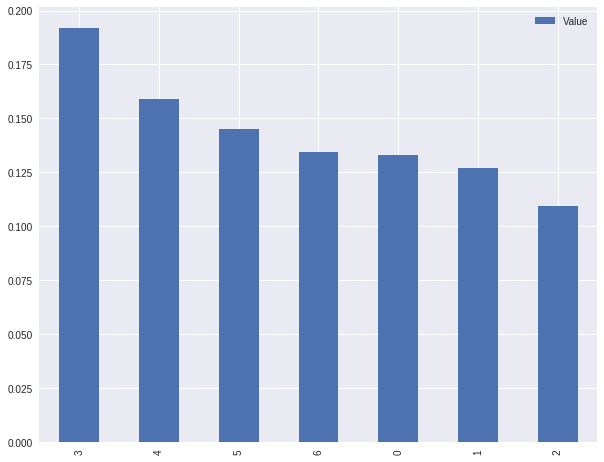

In [21]:
arr = np.column_stack((ftcol,list(rfc.feature_importances_)))
dfplt2 = pd.DataFrame(arr)
dfplt2[1] = dfplt2[1].astype('float')
dfplt2.columns = ['Feature','Value']
dfplt2 = dfplt2.sort_values('Value',ascending=False)
dfplt2.plot(kind='bar',figsize=(10,8))
dfplt2

In [22]:
log_loss(test['Made Donation in March 2007'],test['preds'])

7.7862443663342109

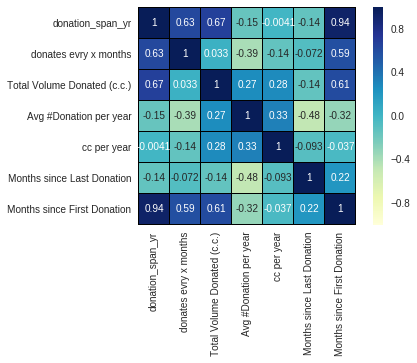

In [23]:
sns.heatmap(train[ftcol].corr(),linewidths=0.25,vmax=1.0, annot =True, square=True, cmap="YlGnBu", linecolor='black')

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression(max_iter =1000,solver='liblinear',verbose=1)
predlr = lr.fit(features,label).predict(test[ftcol])
test['predlr'] = predlr

[LibLinear]

/home/ricky/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [26]:
c2 = ConfusionMatrix(test['Made Donation in March 2007'],test['predlr'])
c2

Predicted    0   1  __all__
Actual                     
0          122   6      128
1           37   8       45
__all__    159  14      173

In [27]:
c2.print_stats()

population: 173
P: 45
N: 128
PositiveTest: 14
NegativeTest: 159
TP: 8
TN: 122
FP: 6
FN: 37
TPR: 0.177777777778
TNR: 0.953125
PPV: 0.571428571429
NPV: 0.767295597484
FPR: 0.046875
FDR: 0.428571428571
FNR: 0.822222222222
ACC: 0.751445086705
F1_score: 0.271186440678
MCC: 0.21057049796
informedness: 0.130902777778
markedness: 0.338724168913
prevalence: 0.260115606936
LRP: 3.79259259259
LRN: 0.862659380692
DOR: 4.3963963964
FOR: 0.232704402516


In [28]:
test_df = pd.read_csv('blood_test.csv')

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0                     200 non-null int64
Months since Last Donation     200 non-null int64
Number of Donations            200 non-null int64
Total Volume Donated (c.c.)    200 non-null int64
Months since First Donation    200 non-null int64
dtypes: int64(5)
memory usage: 7.9 KB


In [30]:
test_df=test_df.rename(columns = {'Unnamed: 0':'ID'})
test_df['donation_span'] = test_df['Months since First Donation'] - train_df['Months since Last Donation']

test_df['cc per year'] = test_df['donation_span'] / 12
test_df['cc per year'] = test_df['Total Volume Donated (c.c.)'] / test_df['cc per year']
test_df['cc per year'] = test_df['cc per year'].replace([np.inf, -np.inf], np.nan)
test_df['cc per year'] = test_df['cc per year'].fillna(0)
test_df['Avg #Donation per year'] = test_df['Months since First Donation'] / 12
test_df['Avg #Donation per year'] = test_df['Number of Donations'] / test_df['Avg #Donation per year'] 
test_df['Avg #Donation per year'] = test_df['Avg #Donation per year'].replace([np.inf, -np.inf], np.nan)
test_df['Avg #Donation per year'] = test_df['Avg #Donation per year'].fillna(0)
test_df['donates evry x months'] = test_df['donation_span'] / test_df['Number of Donations']
test_df['first_time'] = test_df['donation_span'].apply(lambda x : 1 if x == 0 else 0)

In [40]:
test_df['donation_span_yr'] = test_df['donation_span'] / 12

In [41]:
test_df.head()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,donation_span,cc per year,Avg #Donation per year,donates evry x months,first_time,donation_span_yr
0,659,2,12,3000,52,50.0,720.000000,2.769231,4.166667,0,4.166667
1,276,21,7,1750,38,38.0,552.631579,2.210526,5.428571,0,3.166667
2,263,4,1,250,4,3.0,1000.000000,3.000000,3.000000,0,0.250000
3,303,11,11,2750,38,36.0,916.666667,3.473684,3.272727,0,3.000000
4,83,4,12,3000,34,33.0,1090.909091,4.235294,2.750000,0,2.750000


In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
ID                             200 non-null int64
Months since Last Donation     200 non-null int64
Number of Donations            200 non-null int64
Total Volume Donated (c.c.)    200 non-null int64
Months since First Donation    200 non-null int64
donation_span                  200 non-null float64
cc per year                    200 non-null float64
Avg #Donation per year         200 non-null float64
donates evry x months          200 non-null float64
first_time                     200 non-null int64
donation_span_yr               200 non-null float64
dtypes: float64(5), int64(6)
memory usage: 17.3 KB


In [43]:
lr = LogisticRegression(max_iter =1000,solver='liblinear',verbose=1)
predlr = lr.fit(train_df[ftcol].values,train_df['Made Donation in March 2007']).predict_proba(test_df[ftcol])

[LibLinear]

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1500, max_depth=None, min_samples_split=2, random_state=0,verbose=1,n_jobs = 3,warm_start=True)

In [45]:
predreg = rfr.fit(train_df[ftcol].values,train_df['Made Donation in March 2007']).predict(test_df[ftcol])
test_df['predreg'] = predreg

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    0.7s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    0.2s finished


In [46]:
df = pd.DataFrame(predlr)
df.columns = ['LogicPred','LogicPredfinal']

In [47]:
test_df = pd.concat([test_df,df['LogicPredfinal']],axis=1)

In [48]:
test_df.head()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,donation_span,cc per year,Avg #Donation per year,donates evry x months,first_time,donation_span_yr,predreg,LogicPredfinal
0,659,2,12,3000,52,50.0,720.000000,2.769231,4.166667,0,4.166667,0.547859,0.470152
1,276,21,7,1750,38,38.0,552.631579,2.210526,5.428571,0,3.166667,0.340572,0.058337
2,263,4,1,250,4,3.0,1000.000000,3.000000,3.000000,0,0.250000,0.268586,0.337367
3,303,11,11,2750,38,36.0,916.666667,3.473684,3.272727,0,3.000000,0.122944,0.253066
4,83,4,12,3000,34,33.0,1090.909091,4.235294,2.750000,0,2.750000,0.601174,0.478716


In [49]:
test_df[['ID','LogicPredfinal']].to_csv('bloodResult17-3.csv',index=False)

In [50]:
import xgboost as xgb

/home/ricky/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [72]:
x = xgb.XGBClassifier()

xpreds = x.fit(features,label).predict(test[ftcol].values)
test['xgb'] = xpreds

/home/ricky/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
cnfm = ConfusionMatrix(test['Made Donation in March 2007'],test['xgb'])
cnfm

Predicted    0   1  __all__
Actual                     
0          118  10      128
1           28  17       45
__all__    146  27      173

In [74]:
cnfm.print_stats()

population: 173
P: 45
N: 128
PositiveTest: 27
NegativeTest: 146
TP: 17
TN: 118
FP: 10
FN: 28
TPR: 0.377777777778
TNR: 0.921875
PPV: 0.62962962963
NPV: 0.808219178082
FPR: 0.078125
FDR: 0.37037037037
FNR: 0.622222222222
ACC: 0.780346820809
F1_score: 0.472222222222
MCC: 0.362219010376
informedness: 0.299652777778
markedness: 0.437848807712
prevalence: 0.260115606936
LRP: 4.83555555556
LRN: 0.674952919021
DOR: 7.16428571429
FOR: 0.191780821918
